In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions/validation.csv
/kaggle/input/emotions/training.csv
/kaggle/input/emotions/test.csv


In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
data=pd.read_csv('/kaggle/input/emotions/training.csv')

**EDA**

First few rows of the dataset:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None

Summary statistics of numerical columns:
              label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000

Count of unique values in categorical columns

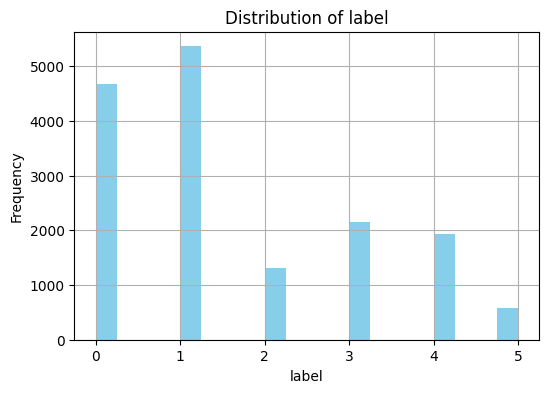


Value counts and bar plots for categorical columns:
text:
text
i feel on the verge of tears from weariness i look at your sweet face and cant help but tenderly kiss your cheeks                                                                          2
i feel kind of strange                                                                                                                                                                     2
i feel more adventurous willing to take risks img src http cdn                                                                                                                             2
i write these words i feel sweet baby kicks from within and my memory is refreshed i would do anything for this boy                                                                        2
i still feel a craving for sweet food                                                                                                                                               

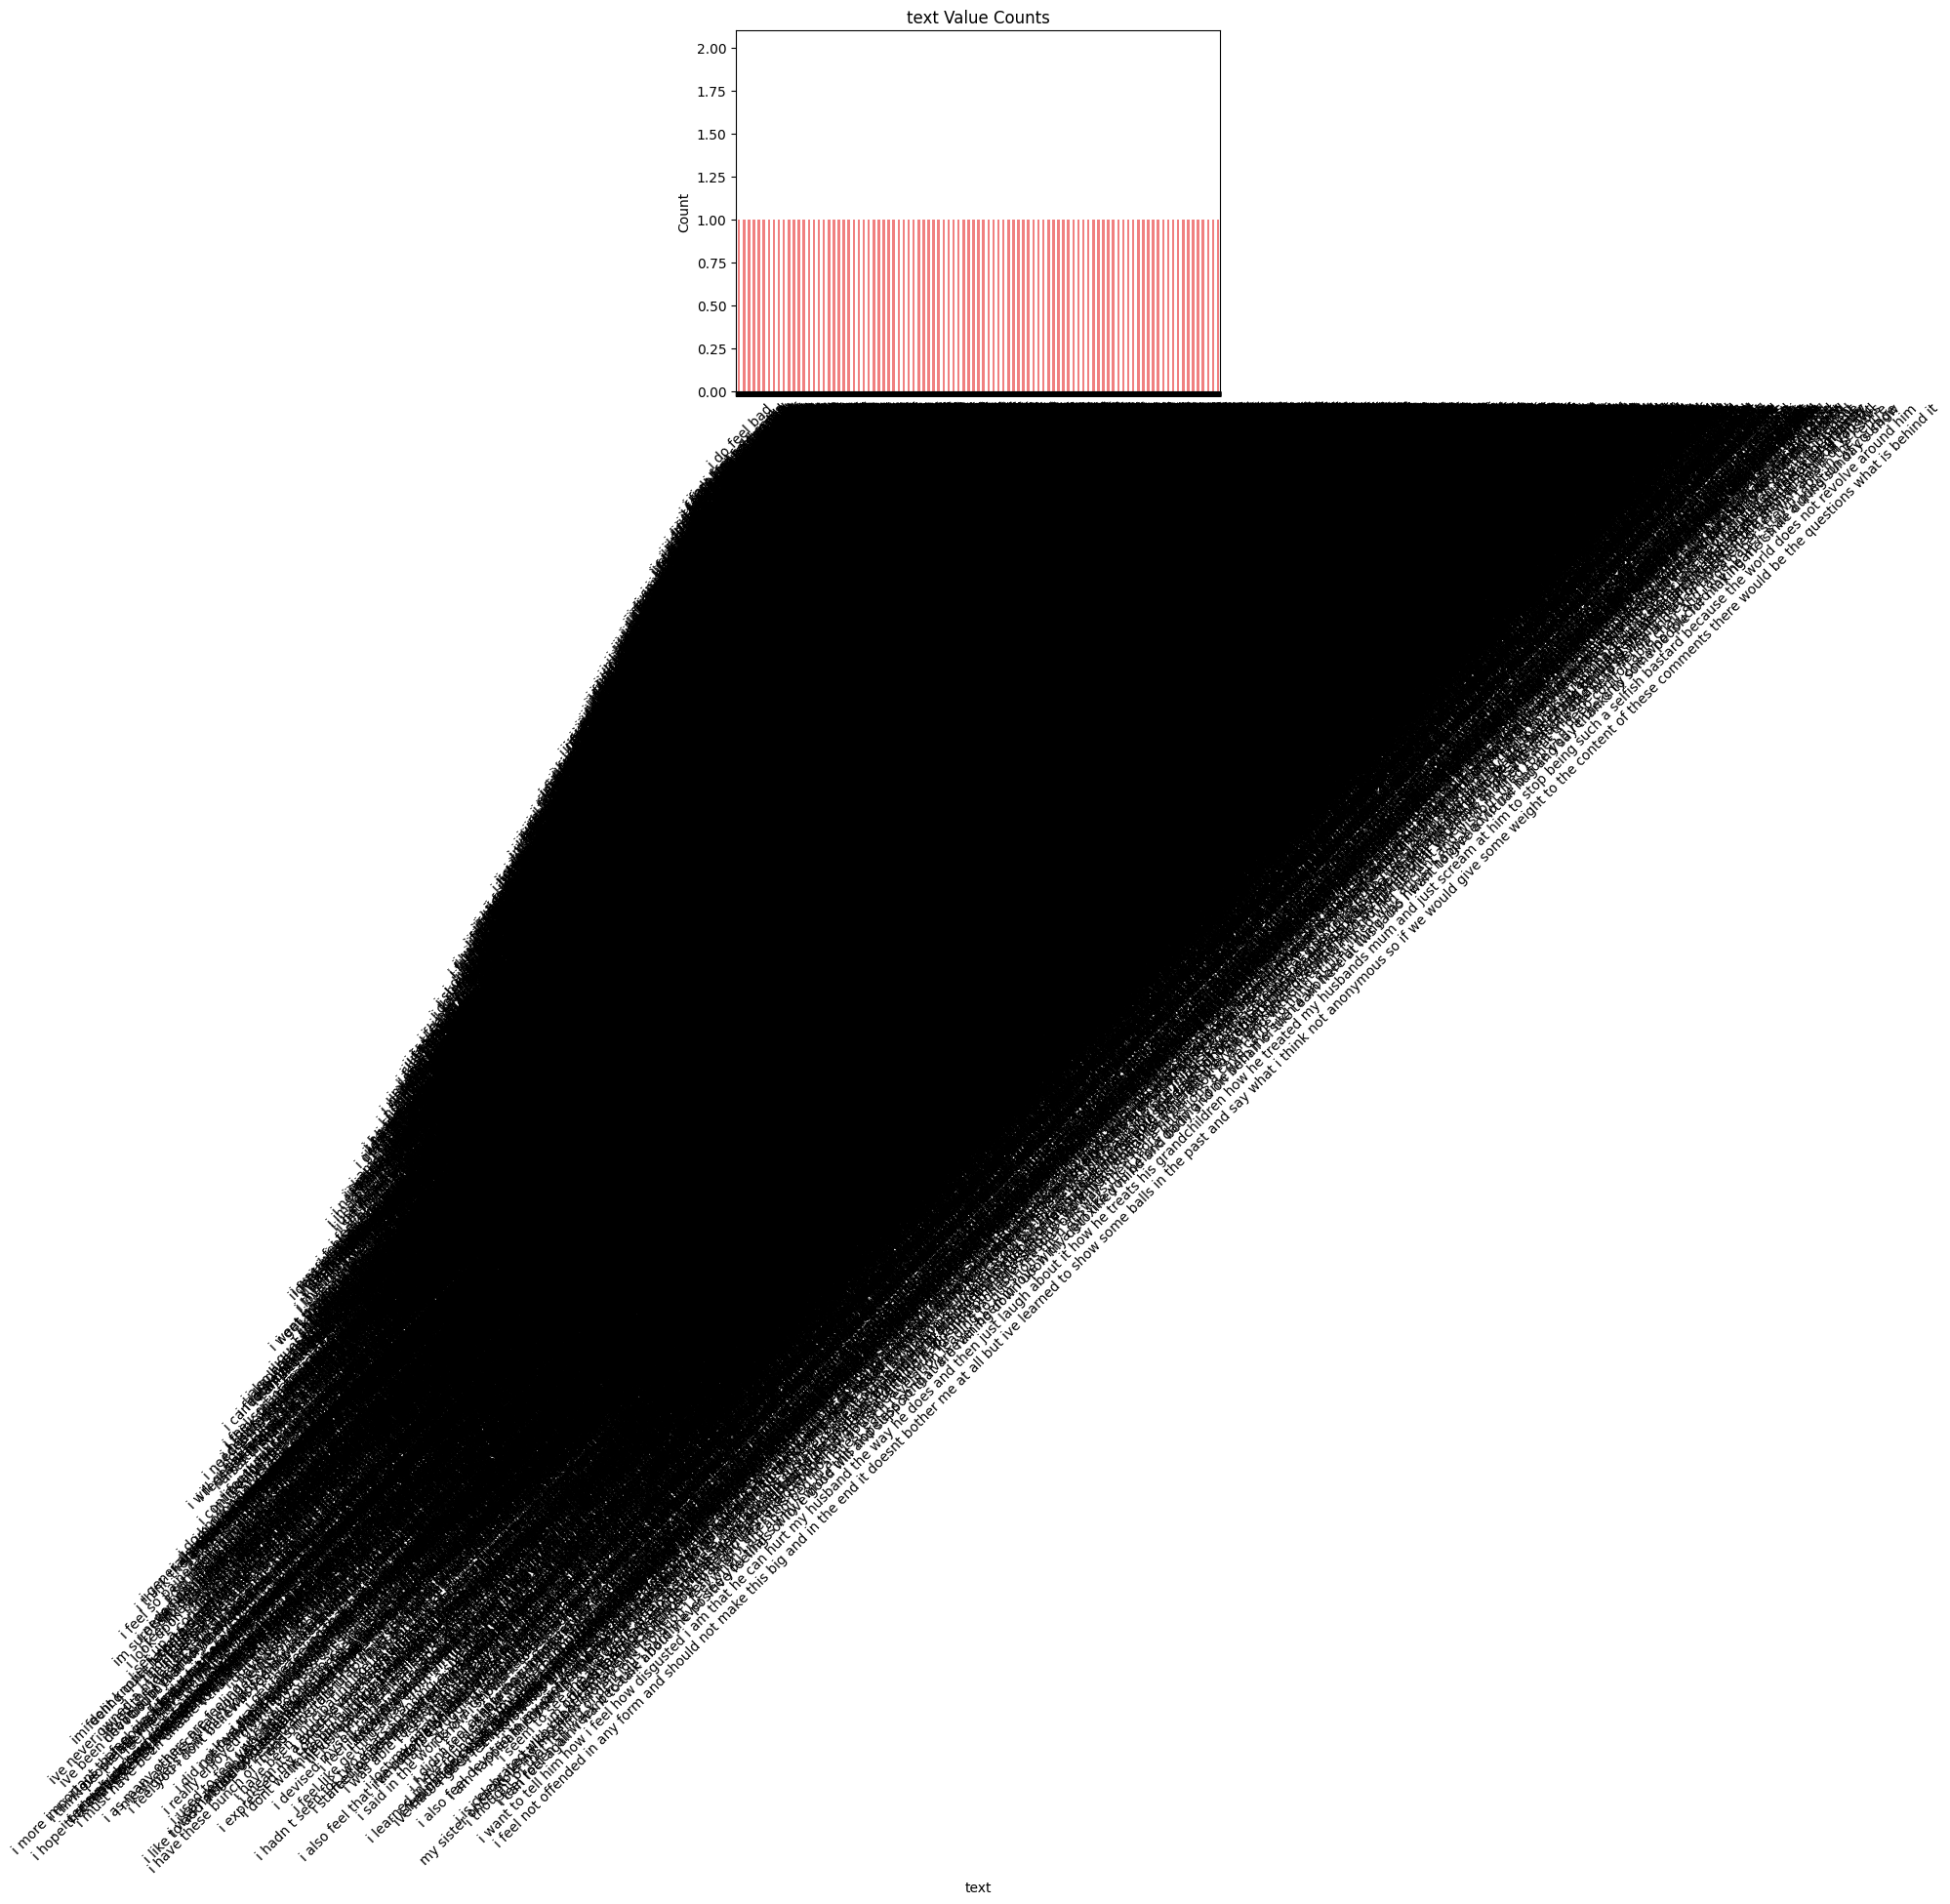

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get information about the dataset (data types, null values, etc.)
print("\nInformation about the dataset:")
print(data.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())

# Count of unique values in categorical columns
print("\nCount of unique values in categorical columns:")
for column in data.select_dtypes(include='object').columns:
    print(f"{column}: {data[column].nunique()} unique values")

# Visualize distribution of numerical columns (histograms)
print("\nDistribution of numerical columns:")
numerical_columns = data.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[column], bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Visualize categorical columns (value counts or bar plots)
print("\nValue counts and bar plots for categorical columns:")
categorical_columns = data.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"{column}:\n{data[column].value_counts()}\n")
    data[column].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'{column} Value Counts')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()




**PREPROCESSING**

In [36]:
import pandas as pd
import re
import nltk
import spacy
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    # Tokenization and lemmatization using spaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha]  # Only perform lemmatization
    
    return ' '.join(tokens)

# Assuming 'data' is your DataFrame loaded with the dataset
# Replace this line with your actual dataset loading method

# Create a new dataframe for preprocessed data
ppdata = data.copy()  # Create a copy to avoid altering the original 'data'

# Apply preprocessing to the 'text' column and store the results in a new column 'clean_text'
ppdata['clean_text'] = ppdata['text'].apply(preprocess_text)

# Check the first few rows of the preprocessed data
print(ppdata.head())


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
                                                text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                          clean_text  
0                            I do not feel humiliate  
1  I can go from feel so hopeless to so damned ho...  
2      I m grab a minute to post I feel greedy wrong  
3  I be ever feel nostalgic about the fireplace I...  
4                                  I be feel grouchy  


In [37]:
ppdata.sample(10)

,text,label,clean_text
7980,i start to hate the fact that whenever i post ...,2,I start to hate the fact that whenever I post ...
4240,i said feeling a little shaky as i stared at t...,4,I say feel a little shaky as I stare at the oc...
9756,i was feeling very stressed with all that i ha...,3,I be feel very stressed with all that I have t...
7952,i am in size now and im afrad its making me fe...,1,I be in size now and I m afrad its make I feel...
15303,i feel like everyone will think i am a fake an...,0,I feel like everyone will think I be a fake an...
3529,i do feel sympathetic and try to help when i c...,2,I do feel sympathetic and try to help when I c...
1098,i came across the exchange point feeling strong,1,I come across the exchange point feel strong
370,i crave as i fall into submission and i did no...,0,I crave as I fall into submission and I do not...
4631,i think about myself personally when it comes ...,3,I think about myself personally when it come t...
4665,i cannot seem to shake this feeling of being c...,0,I can not seem to shake this feeling of be com...


**Tf-idf->RFC on actual data**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import pandas as pd

# Assuming 'text' is the column containing the text and 'label' is the column containing labels
text_data = data['text']
labels = data['label']

# TF-IDF vectorization
tfidf = TfidfVectorizer()
embd = tfidf.fit_transform(text_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embd, labels, test_size=0.2, random_state=42)

# Define the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Define hyperparameters and values to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    # Add other parameters to tune
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
#predictions = best_model.predict(X_test)
#accuracy = accuracy_score(y_test, predictions)
#print(f"Accuracy of RandomForestClassifier after hyperparameter tuning: {accuracy}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy: 0.8578125
Precision: 0.8631749356699328
Recall: 0.8578125
F1-score: 0.8561432406938801
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       946
           1       0.79      0.94      0.86      1021
           2       0.86      0.65      0.74       296
           3       0.91      0.82      0.86       427
           4       0.86      0.80      0.83       397
           5       0.86      0.68      0.76       113

    accuracy                           0.86      3200
   macro avg       0.87      0.80      0.83      3200
weighted avg       0.86      0.86      0.86      3200

Confusion Matrix:
 [[845  64   7  17  11   2]
 [ 24 963  22   2   8   2]
 [  3  94 191   6   2   0]
 [ 21  41   1 350  14   0]
 [ 16  41   1  11 319   9]
 [  4  13   0   0  19  77]]


**Tf-idf -> SVM on actual data**

In [39]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#import pandas as pd

# Assuming 'text' is the column containing the text and 'label' is the column containing labels
text_data = data['text']
labels = data['label']

# TF-IDF vectorization
tfidf = TfidfVectorizer()
embd = tfidf.fit_transform(text_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embd, labels, test_size=0.2, random_state=42)

# Define the Support Vector Classifier (SVC)
svc = SVC(random_state=42)

# Define hyperparameters and values to tune
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    # Add other parameters to tune
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of SVM after hyperparameter tuning: {accuracy}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of SVM after hyperparameter tuning: 0.8759375
Accuracy: 0.8759375
Precision: 0.875603197953412
Recall: 0.8759375
F1-score: 0.8735030687666844
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       946
           1       0.85      0.94      0.90      1021
           2       0.84      0.66      0.74       296
           3       0.91      0.85      0.88       427
           4       0.85      0.83      0.84       397
           5       0.83      0.65      0.73       113

    accuracy                           0.88      3200
   macro avg       0.86      0.81      0.83      3200
weighted avg       0.88      0.88      0.87      3200

Confusion Matrix:
 [[877  25   8  17  16   3]
 [ 21 964  25   4   5   2]
 [  6  86 195   5   4   0]
 [ 25  23   1 365  12   1]
 [ 24  21   2  12 329   9]
 [  6  10   1   0  23  73]]


**Tf-idf -> RFC on preprocessed data**

In [40]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#import pandas as pd

# Assuming 'text' is the column containing the text and 'label' is the column containing labels
ctext_data = ppdata['clean_text']
clabels = ppdata['label']

# TF-IDF vectorization
tfidf = TfidfVectorizer()
embd_c = tfidf.fit_transform(ctext_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embd_c, clabels, test_size=0.2, random_state=42)

# Define the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Define hyperparameters and values to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    # Add other parameters to tune
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of RandomForestClassifier after hyperparameter tuning: {accuracy}")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of RandomForestClassifier after hyperparameter tuning: 0.819375
Accuracy: 0.819375
Precision: 0.8304903997795848
Recall: 0.819375
F1-score: 0.8155340172945607
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       946
           1       0.74      0.94      0.83      1021
           2       0.88      0.52      0.66       296
           3       0.86      0.75      0.80       427
           4       0.84      0.79      0.82       397
           5       0.82      0.60      0.69       113

    accuracy                           0.82      3200
   macro avg       0.84      0.74      0.78      3200
weighted avg       0.83      0.82      0.82      3200

Confusion Matrix:
 [[805  98   3  24  13   3]
 [ 24 961  16  10   8   2]
 [ 10 122 155   4   5   0]
 [ 36  57   1 320  13   0]
 [ 17  43   1  13 313  10]
 [  8  17   0   1  19  68]]


**Tf-idf -> SVM on preprocessed data**

****

In [41]:
ctext_data = ppdata['clean_text']
clabels = ppdata['label']

# TF-IDF vectorization
tfidf = TfidfVectorizer()
embdc = tfidf.fit_transform(ctext_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embdc, clabels, test_size=0.2, random_state=42)

# Define the Support Vector Classifier (SVC)
svc = SVC(random_state=42)

# Define hyperparameters and values to tune
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    # Add other parameters to tune
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of SVM after hyperparameter tuning: {accuracy}")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of SVM after hyperparameter tuning: 0.8553125
Accuracy: 0.8553125
Precision: 0.8552819446888996
Recall: 0.8553125
F1-score: 0.8512619761674971
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       946
           1       0.83      0.94      0.88      1021
           2       0.85      0.59      0.70       296
           3       0.88      0.82      0.85       427
           4       0.84      0.78      0.81       397
           5       0.81      0.60      0.69       113

    accuracy                           0.86      3200
   macro avg       0.85      0.78      0.81      3200
weighted avg       0.86      0.86      0.85      3200

Confusion Matrix:
 [[874  31   4  19  15   3]
 [ 26 958  22   7   5   3]
 [ 13  98 175   6   4   0]
 [ 36  23   3 351  13   1]
 [ 27  31   3  16 311   9]
 [ 14  10   0   0  21  68]]


**BOW -> SVM on actual data**

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd


# Assuming 'text' is the column containing the text and 'label' is the column containing labels
text_data = data['text']
labels = data['label']

# Count Vectorization
cv = CountVectorizer()
bow = cv.fit_transform(text_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow, labels, test_size=0.2, random_state=42)

# Define the SVM classifier
svm_c = SVC()

# Define hyperparameters and values to tune
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    # Add other parameters to tune
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_c, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of SVM Classifier after hyperparameter tuning: {accuracy}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of SVM Classifier after hyperparameter tuning: 0.88375
Accuracy: 0.88375
Precision: 0.8841978713326759
Recall: 0.88375
F1-score: 0.8826267755087673
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       946
           1       0.87      0.93      0.90      1021
           2       0.84      0.72      0.77       296
           3       0.90      0.87      0.89       427
           4       0.82      0.88      0.85       397
           5       0.87      0.67      0.76       113

    accuracy                           0.88      3200
   macro avg       0.87      0.83      0.85      3200
weighted avg       0.88      0.88      0.88      3200

Confusion Matrix:
 [[867  21  12  21  22   3]
 [ 30 950  23   5   9   4]
 [  2  76 213   2   3   0]
 [ 19  16   3 373  15   1]
 [ 11  17   3  14 349   3]
 [  1   7   0   0  29  76]]


**BOW -> RFC on actual data**

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#import pandas as pd

# Assuming 'text' is the column containing the text and 'label' is the column containing labels
text_data = data['text']
labels = data['label']

# Count Vectorization
cv = CountVectorizer()
bow = cv.fit_transform(text_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow, labels, test_size=0.2, random_state=42)

# Define the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Define hyperparameters and values to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    # Add other parameters to tune
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of RandomForestClassifier after hyperparameter tuning: {accuracy}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of RandomForestClassifier after hyperparameter tuning: 0.873125
Accuracy: 0.873125
Precision: 0.8746277438711693
Recall: 0.873125
F1-score: 0.8718759010751025
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       946
           1       0.84      0.94      0.88      1021
           2       0.87      0.70      0.78       296
           3       0.89      0.85      0.87       427
           4       0.85      0.82      0.84       397
           5       0.82      0.74      0.78       113

    accuracy                           0.87      3200
   macro avg       0.87      0.83      0.84      3200
weighted avg       0.87      0.87      0.87      3200

Confusion Matrix:
 [[859  45   4  20  16   2]
 [ 26 957  23   5   9   1]
 [  3  78 207   5   3   0]
 [ 22  28   2 363  11   1]
 [ 16  28   1  14 324  14]
 [  3   9   1   0  16  84]]


**BOW ->SVM on preproccessed data**

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming 'text' is the column containing the text and 'label' is the column containing labels
ctext_data = ppdata['clean_text']
clabels = ppdata['label']

# Count Vectorization
cv = CountVectorizer()
cbow = cv.fit_transform(ctext_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cbow, clabels, test_size=0.2, random_state=42)

# Define the SVM classifier
svm_c = SVC()

# Define hyperparameters and values to tune
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    # Add other parameters to tune
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_c, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of SVM Classifier after hyperparameter tuning: {accuracy}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of SVM Classifier after hyperparameter tuning: 0.856875
Accuracy: 0.856875
Precision: 0.8570223324820871
Recall: 0.856875
F1-score: 0.8531852422174693
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       946
           1       0.83      0.93      0.88      1021
           2       0.82      0.59      0.69       296
           3       0.88      0.82      0.85       427
           4       0.81      0.85      0.83       397
           5       0.85      0.57      0.68       113

    accuracy                           0.86      3200
   macro avg       0.85      0.78      0.81      3200
weighted avg       0.86      0.86      0.85      3200

Confusion Matrix:
 [[869  28   6  20  20   3]
 [ 27 947  24   9   9   5]
 [  9 101 175   7   4   0]
 [ 29  26   3 351  17   1]
 [ 17  24   4  14 336   2]
 [  8  13   1   0  27  64]]


**BOW ->RFC on preproccessed data**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#import pandas as pd

# Assuming 'text' is the column containing the text and 'label' is the column containing labels
ctext_data = ppdata['clean_text']
clabels = ppdata['label']

# Count Vectorization
cv = CountVectorizer()
cbow = cv.fit_transform(ctext_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cbow, clabels, test_size=0.2, random_state=42)

# Define the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Define hyperparameters and values to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    # Add other parameters to tune
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of RandomForestClassifier after hyperparameter tuning: {accuracy}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the best model on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)


Accuracy of RandomForestClassifier after hyperparameter tuning: 0.84375
Accuracy: 0.84375
Precision: 0.8466880121043754
Recall: 0.84375
F1-score: 0.8412284770616053
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       946
           1       0.80      0.93      0.86      1021
           2       0.85      0.60      0.70       296
           3       0.86      0.81      0.83       427
           4       0.85      0.78      0.81       397
           5       0.78      0.68      0.73       113

    accuracy                           0.84      3200
   macro avg       0.84      0.78      0.81      3200
weighted avg       0.85      0.84      0.84      3200

Confusion Matrix:
 [[841  59   5  22  16   3]
 [ 25 947  25  12  10   2]
 [  5 104 178   6   3   0]
 [ 35  34   0 346  11   1]
 [ 17  34   1  18 311  16]
 [  7  13   0   0  16  77]]


**Fastext -> XGBoost**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import FastText
from xgboost import XGBClassifier
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load your dataset
#data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your dataset path

# Preprocess your text data if needed

# Split data into features (X) and labels (y)
X = data['text'].tolist()
y = data['label'].tolist()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train FastText model on your corpus
fasttext_model = FastText(sentences=X_train, vector_size=500, window=10, min_count=1, workers=4)

# Create an embedding matrix for words in the dataset
embedding_matrix = np.zeros((len(fasttext_model.wv.index_to_key), fasttext_model.vector_size))
for i, word in enumerate(fasttext_model.wv.index_to_key):
    embedding_matrix[i] = fasttext_model.wv[word]

# Map words in the dataset to corresponding indices in the embedding matrix
word_to_index = {word: i for i, word in enumerate(fasttext_model.wv.index_to_key)}

# Convert text data to vectors using FastText embeddings
def text_to_vectors(text):
    return [word_to_index[word] for word in text.split() if word in word_to_index]

X_train_vectors = [text_to_vectors(text) for text in X_train]
X_test_vectors = [text_to_vectors(text) for text in X_test]

# Pad sequences to a fixed length
max_length = 100  # Define your desired fixed length
X_train_padded = pad_sequences(X_train_vectors, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_vectors, maxlen=max_length, padding='post')

# Train XGBoost classifier using FastText embeddings
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_padded, y_train)

# Evaluate the classifier on training set
train_accuracy = xgb_classifier.score(X_train_padded, y_train)
print(f"Accuracy of XGBoost Classifier on training set: {train_accuracy}")

# Evaluate the classifier on test set
test_accuracy = xgb_classifier.score(X_test_padded, y_test)
print(f"Accuracy of XGBoost Classifier on test set: {test_accuracy}")



Accuracy of XGBoost Classifier on training set: 0.36328125
Accuracy of XGBoost Classifier on test set: 0.31625


**Generating word2vec embeddings**

In [47]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd

# Assuming 'text' is the column containing the text and 'labels' is the column containing labels
texts = data['text'].tolist()

# Tokenize the text into words (assuming it's not pre-tokenized)
tokenized_texts = [word_tokenize(text) for text in texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Retrieve Word2Vec embeddings for words
# Example: Getting the embedding for the word 'example'
word_embedding = word2vec_model.wv['example']
print("Embedding for 'example':", word_embedding)


Embedding for 'example': [-0.04585189  0.1289487  -0.03653328 -0.05912657 -0.00149433 -0.18574144
  0.08481063  0.25000522 -0.07556636 -0.08220366 -0.00985198 -0.162531
  0.02122154  0.10736067  0.04470831 -0.12081163  0.07386713 -0.22344011
 -0.09840065 -0.26256835  0.01034689  0.07563446  0.06196561 -0.10595848
 -0.00355975 -0.13584578 -0.00790205 -0.04873491 -0.1192276  -0.01217841
  0.21848759 -0.08998973 -0.01059101 -0.15280981 -0.03894527  0.15186338
  0.06218825 -0.03900667 -0.08516888 -0.19000058  0.02131588 -0.10814287
 -0.06910191 -0.02418559  0.19116072 -0.03598714 -0.18852104 -0.01068205
  0.04977503  0.0559164   0.01318469 -0.01622217 -0.02062562 -0.05220651
 -0.06854306  0.0508793   0.10698508 -0.04843017 -0.12271218  0.03002443
  0.111466   -0.0436476  -0.01735831 -0.01866974 -0.147926    0.10392147
 -0.0456849   0.05811903 -0.12669551  0.0850352  -0.05474247  0.0626494
  0.09224372  0.03595631  0.06249437  0.00474549  0.06281748  0.02851431
 -0.0730376  -0.03842711 -0.0

**word2vec -> SVM ->actual data**

In [48]:
#from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
#import pandas as pd



# Assuming 'text' is the column containing the text and 'labels' is the column containing labels
texts = data['text'].tolist()
labels = data['label'].tolist()

# Tokenize the text into words (assuming it's not pre-tokenized)
tokenized_texts = [word_tokenize(text) for text in texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Convert text data to average Word2Vec vectors
def text_to_vector(text):
    words = word_tokenize(text)
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) > 0:
        return sum(word_vectors) / len(word_vectors)
    else:
        return None

X = [text_to_vector(text) for text in texts]
y = labels

# Remove None values (where text couldn't be tokenized properly)
X = [vec for vec in X if vec is not None]
y = y[:len(X)]  # Make labels match the length of X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy of SVM Classifier: {accuracy}")


Accuracy of SVM Classifier: 0.3653125


**word2vec -> SVM ->preproccessed data**

In [49]:
#from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
#import pandas as pd

# Assuming 'text' is the column containing the text and 'labels' is the column containing labels
ctexts = ppdata['clean_text'].tolist()
clabels = ppdata['label'].tolist()

# Tokenize the text into words (assuming it's not pre-tokenized)
tokenized_texts = [word_tokenize(text) for text in ctexts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Convert text data to average Word2Vec vectors
def text_to_vector(text):
    words = word_tokenize(text)
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) > 0:
        return sum(word_vectors) / len(word_vectors)
    else:
        return None

X = [text_to_vector(text) for text in ctexts]
y = clabels

# Remove None values (where text couldn't be tokenized properly)
X = [vec for vec in X if vec is not None]
y = y[:len(X)]  # Make labels match the length of X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy of SVM Classifier: {accuracy}")


Accuracy of SVM Classifier: 0.35


**Word2vec -> RFC -> actual data**

In [50]:
#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from gensim.models import Word2Vec
#from nltk.tokenize import word_tokenize
#import pandas as pd

# Tokenize the text into words (assuming it's not pre-tokenized)
tokenized_texts = [word_tokenize(text) for text in texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Convert text data to average Word2Vec vectors
def text_to_vector(text):
    words = word_tokenize(text)
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(word_vectors) > 0:
        return sum(word_vectors) / len(word_vectors)
    else:
        return None

X = [text_to_vector(text) for text in texts]
y = labels

# Remove None values (where text couldn't be tokenized properly)
X = [vec for vec in X if vec is not None]
y = y[:len(X)]  # Make labels match the length of X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the classifier
accuracy = rf_classifier.score(X_test, y_test)
print(f"Accuracy of Random Forest Classifier: {accuracy}")


Accuracy of Random Forest Classifier: 0.3409375
